In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from utils import read_data, clean_data

### Taking arbitrary route ,age, discount and tarif class and plot the ticket prices for a single day

### 1. Read and clean data

In [2]:
date = '10_01_2023'
route='berlin-memmingen'
age='E'
discount='1'
tariffClass='1'
path=f'data/{route}/data_{age}_{discount}_{tariffClass}/{date}.csv'

In [3]:
df = clean_data(read_data(path))
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
0,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
1,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
3,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
4,25.40,Super Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28


### 2. data exploration

first step: plotting prices of one day with arbitrary input parameter

/tmp/ipykernel_37696/3541592543.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


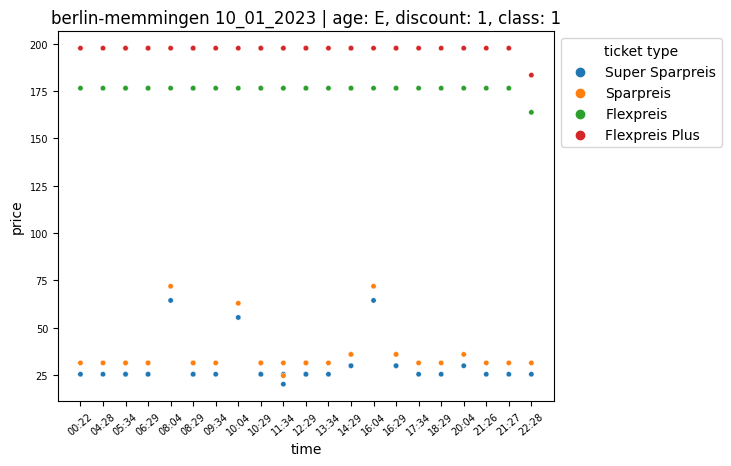

In [6]:
plt = sb.scatterplot(data=df, x='time', y='price', hue='ticket type', s=15)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
plt.tick_params(labelsize=7)
title = f'{route} {date} | age: {age}, discount: {discount}, class: {tariffClass}'
plt.set(title=title)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

What is immediately noticeable here is that the flex prices are not consistently expensive throughout the day. In the evening, at 22:28 it is about ~ 15 € cheaper. Since you can take any train on the purchased connection with a Flexpreis ticket, this actually makes no sense. Perhaps the connection is particularly bad in the evening and the ticket is therefore cheaper.

In [7]:
# filter for personal preference => max 8,3 h, 2 umstiege
# compare for all days of week
# possible to plot multiple days in one plot/ calculate average across 90 days for every distinct departure time?
# also for different routes

In [8]:
df_Flexpreis_plus = df.loc[df['ticket type'] == 'Flexpreis Plus']
df_Flexpreis_plus.sort_values('price')
flexpreis_plus_max = df_Flexpreis_plus.iloc[0]
flexpreis_plus_min = df_Flexpreis_plus.iloc[-1]
min_max_flexpreis_plus = pd.concat([flexpreis_plus_max, flexpreis_plus_min], axis=1)
min_max_flexpreis_plus = min_max_flexpreis_plus.transpose()
min_max_flexpreis_plus

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
3,197.7,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
115,183.45,Flexpreis Plus,E,1,Berlin,Memmingen,3,1,2023-01-10 22:28:00,2023-01-11 08:51:00,623.0,22:28


Here the small price difference becomes a little clearer, since one must change with the second connection once more, it is apparently more favorable, nevertheless both connections take the same time.

In [9]:
df_Flexpreis = df.loc[df['ticket type'] == 'Flexpreis']
df_Flexpreis.sort_values('price')
flexpreis_max = df_Flexpreis.iloc[0]
flexpreis_min = df_Flexpreis.iloc[-1]
min_max_flexpreis = pd.concat([flexpreis_max, flexpreis_min], axis=1)
min_max_flexpreis = min_max_flexpreis.transpose()
min_max_flexpreis

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
114,163.8,Flexpreis,E,1,Berlin,Memmingen,3,1,2023-01-10 22:28:00,2023-01-11 08:51:00,623.0,22:28


Same applies to Flexpreis tickets.

As the connections above are comparable long they are not really relevant for me. I want to compare the prices across all days for the Flexpreis and the Flexpreis Plus ticket setting two custom constriants:
- Connection with max. 3 changes
- Connection with a max. duration of 439 min 

In [17]:
df_Flexpreis_plus = df.loc[df['ticket type'] == 'Flexpreis Plus']
flexpreis_plus_min = df_Flexpreis_plus['price'].min()
flexpreis_plus_max = df_Flexpreis_plus['price'].max()

df_Flexpreis = df.loc[df['ticket type'] == 'Flexpreis']
flexpreis_min = df_Flexpreis['price'].min()
flexpreis_max = df_Flexpreis['price'].max()
df_Sparpreis = df.loc[df['ticket type'] == 'Sparpreis']
sparpreis_min = df_Sparpreis['price'].min()
sparpreis_max = df_Sparpreis['price'].max()
df_Super_Sparpreis = df.loc[df['ticket type'] == 'Super Sparpreis']
super_Sparpreis_min = df_Super_Sparpreis['price'].min()
super_Sparpreis_max = df_Super_Sparpreis['price'].max()

min_max_of_day = {
                'ticket types': ['Flexpreis Plus', 'Flexpreis', 'Sparpreis', 'Sparpreis Plus'],
                'min': [flexpreis_plus_min, flexpreis_min, sparpreis_min, super_Sparpreis_min],
                'max': [flexpreis_plus_max, flexpreis_max, sparpreis_max, super_Sparpreis_max],
                'changes': 1,
                'duration':1,
                }
min_max_of_day = pd.DataFrame(data=min_max_of_day)
min_max_of_day
# also get time 

,ticket types,min,max,changes,duration
0,Flexpreis Plus,183.45,197.70,1,1
1,Flexpreis,163.80,176.55,1,1
2,Sparpreis,24.65,71.90,1,1
3,Sparpreis Plus,20.15,64.40,1,1


In [126]:
df

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
0,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
1,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
3,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
4,25.40,Super Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
5,31.40,Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
6,176.55,Flexpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
7,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
8,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 05:34:00,2023-01-10 11:48:00,374.0,05:34
9,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 05:34:00,2023-01-10 11:48:00,374.0,05:34
